In [70]:
# import all the required libraries..

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit


In [71]:
# Load the dataset
df = pd.read_csv('Hospitals In India (Anonymized).csv')

df.head()

,id,City,State,District,Density,Latitude,Longitude,Rating,Number of Reviews
0,Hospital #0,Anantpur,Andhra Pradesh,Ananthapuramu,219.608,14.696533,77.584570,4.1,229
1,Hospital #1,Anantpur,Andhra Pradesh,Ananthapuramu,219.608,14.660635,77.579342,4.9,19172
2,Hospital #2,Chitoor,Andhra Pradesh,Chittoor,273.230,13.229217,79.084472,3.9,139
3,Hospital #3,Chittoor,Andhra Pradesh,Chittoor,273.230,13.303435,78.972117,4.0,92
4,Hospital #4,East Godavari,Andhra Pradesh,East Godavari,715.460,16.970995,82.230396,4.8,8090


In [72]:
# Check for missing values
df.isnull().sum()

id                   0
City                 0
State                0
District             0
Density              0
Latitude             0
Longitude            0
Rating               0
Number of Reviews    0
dtype: int64

### Relational Graph(Scatter Plot)

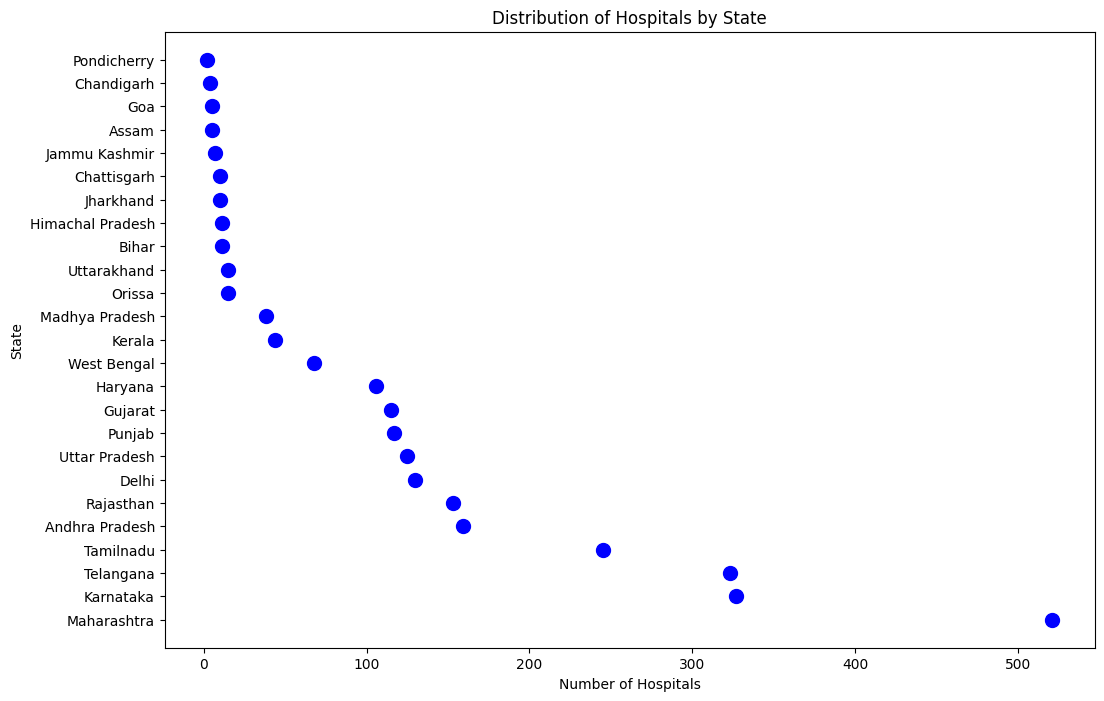

In [73]:
def plot_Scatterplot_hospital_distribution(df):
    # Get the counts of hospitals by state
    hospital_counts = df['State'].value_counts()

    # Create the scatter plot
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.scatter(hospital_counts.values, hospital_counts.index, s=100, color='blue', marker='o')

    # Set the title and labels
    ax.set_title('Distribution of Hospitals by State')
    ax.set_xlabel('Number of Hospitals')
    ax.set_ylabel('State')

    #plt.savefig('Scatterplot.png')---for saving image
    plt.show()


plot_Scatterplot_hospital_distribution(df)



### Categorical Graph(Histogram)

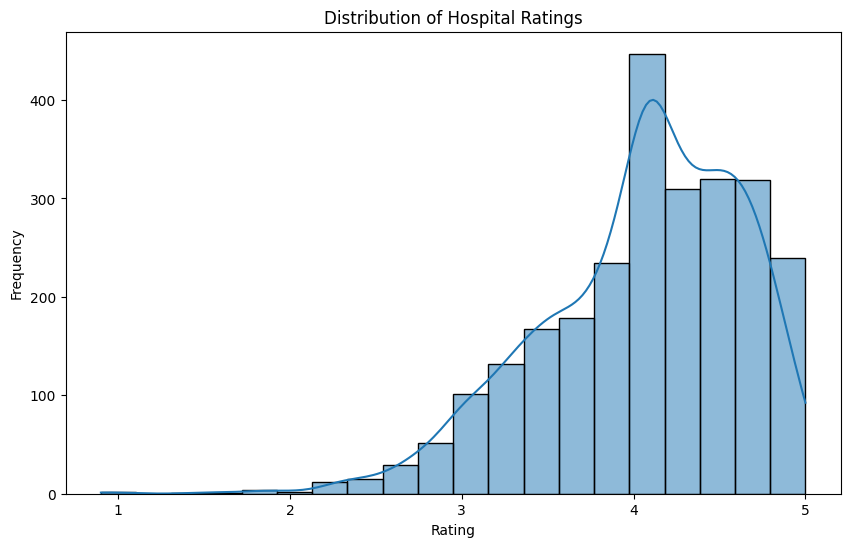

In [74]:
# Function to plot the distribution of hospital ratings
def plot_hist_hospital_ratings_distribution(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Plot the histogram and KDE using seaborn (since seaborn is built on top of matplotlib)
    sns.histplot(df['Rating'], bins=20, kde=True, ax=ax)
    
    # Set title and labels
    ax.set_title('Distribution of Hospital Ratings')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Frequency')
    #plt.savefig('histplot.png')--for saving image
    plt.show()


plot_hist_hospital_ratings_distribution(df)


### Statstical Graph(HeatMap)

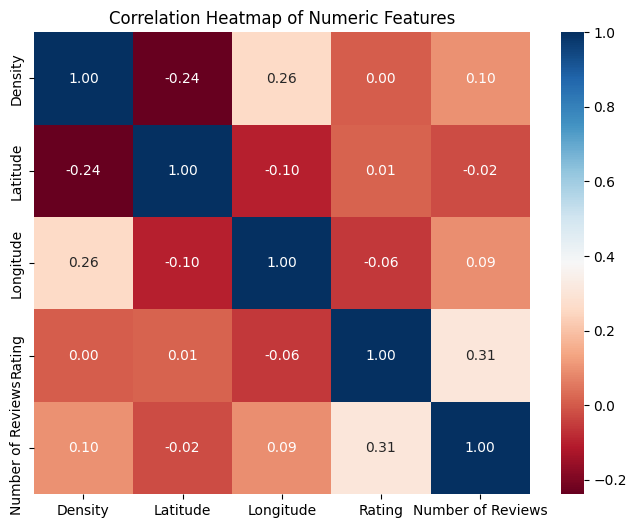

In [75]:
# Function to plot the correlation heatmap 
def plot_correlation_heatmap(df):
    numeric_df = df.select_dtypes(include=[np.number])
    fig, ax = plt.subplots(figsize=(8, 6))

    # Plot the correlation heatmap
    sns.heatmap(numeric_df.corr(), annot=True, cmap='RdBu', fmt='.2f', ax=ax)

    # Set the title
    ax.set_title('Correlation Heatmap of Numeric Features')
    #plt.savefig('heatmapplot.png')--for saving Image
    plt.show()

plot_correlation_heatmap(df)


### Some Statstical Analysis

In [76]:
# Function to perform basic statistical analysis
def basic_statistics(df):
    """
    This function performs basic statistical analysis, including mean, median, standard deviation,
    skewness, and kurtosis for the numeric columns in the dataframe. It also generates a correlation matrix.
    """
    # Describe basic statistics
    description = df.describe()
    
    # Skewness and Kurtosis
    skewness = df.skew()
    kurtosis = df.kurt()
    
    # Correlation matrix
    corr_matrix = df.corr()
    
    print("Basic Statistics:\n", description)
    print("\nSkewness:\n", skewness)
    print("\nKurtosis:\n", kurtosis)
    print("\nCorrelation Matrix:\n", corr_matrix)

    return description, skewness, kurtosis, corr_matrix

basic_statistics(df)

Basic Statistics:
             Density     Latitude    Longitude       Rating  Number of Reviews
count   2566.000000  2566.000000  2566.000000  2566.000000        2566.000000
mean    5873.818104    20.029001    77.041146     4.045129        1239.772408
std     7653.553968     6.129149     3.375444     0.589510        3405.920004
min       35.000000     8.149180    70.740753     0.900000           1.000000
25%      603.000000    15.480476    73.963882     3.700000          78.000000
50%     1869.800000    19.060019    77.149308     4.100000         229.000000
75%    17000.000000    25.726817    78.479383     4.500000         783.000000
max    24252.000000    34.090559    91.751558     5.000000       45904.000000

Skewness:
 Density              1.114671
Latitude             0.339408
Longitude            1.158193
Rating              -0.799004
Number of Reviews    6.201730
dtype: float64

Kurtosis:
 Density              -0.546452
Latitude             -0.987100
Longitude             2.4077

C:\Users\yyy\AppData\Local\Temp\ipykernel_15024\1352785774.py:11: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  skewness = df.skew()
C:\Users\yyy\AppData\Local\Temp\ipykernel_15024\1352785774.py:12: FutureWarning: The default value of numeric_only in DataFrame.kurt is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  kurtosis = df.kurt()
C:\Users\yyy\AppData\Local\Temp\ipykernel_15024\1352785774.py:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence t

(            Density     Latitude    Longitude       Rating  Number of Reviews
 count   2566.000000  2566.000000  2566.000000  2566.000000        2566.000000
 mean    5873.818104    20.029001    77.041146     4.045129        1239.772408
 std     7653.553968     6.129149     3.375444     0.589510        3405.920004
 min       35.000000     8.149180    70.740753     0.900000           1.000000
 25%      603.000000    15.480476    73.963882     3.700000          78.000000
 50%     1869.800000    19.060019    77.149308     4.100000         229.000000
 75%    17000.000000    25.726817    78.479383     4.500000         783.000000
 max    24252.000000    34.090559    91.751558     5.000000       45904.000000,
 Density              1.114671
 Latitude             0.339408
 Longitude            1.158193
 Rating              -0.799004
 Number of Reviews    6.201730
 dtype: float64,
 Density              -0.546452
 Latitude             -0.987100
 Longitude             2.407789
 Rating             

### Both Elbow  and silhouette plots

C:\Users\yyy\5442\ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yyy\5442\ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yyy\5442\ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yyy\5442\ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\yyy\5442\ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:8

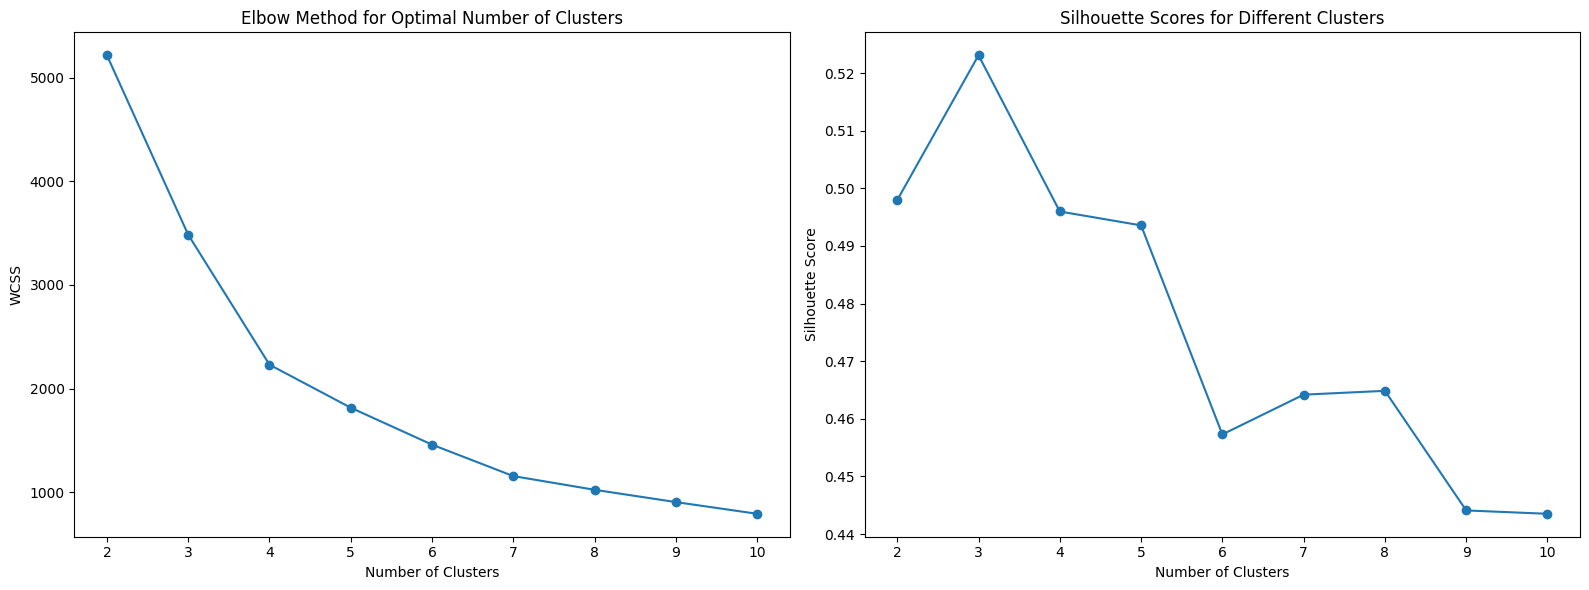

In [77]:
# Function to plot elbow and silhouette plots
def elbow_silhouette_plot(df):
    
    clustering_data = df[['Rating', 'Number of Reviews', 'Density']].dropna()

    # Normalize the data
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data)

    # Elbow method to find the optimal number of clusters
    wcss = []
    silhouette_scores = []

    for i in range(2, 11):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(clustering_data_scaled)
        wcss.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(clustering_data_scaled, kmeans.labels_))

    # Create subplots for elbow and silhouette plots
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    # Elbow method plot
    ax[0].plot(range(2, 11), wcss, marker='o')
    ax[0].set_title('Elbow Method for Optimal Number of Clusters')
    ax[0].set_xlabel('Number of Clusters')
    ax[0].set_ylabel('WCSS')

    # Silhouette score plot
    ax[1].plot(range(2, 11), silhouette_scores, marker='o')
    ax[1].set_title('Silhouette Scores for Different Clusters')
    ax[1].set_xlabel('Number of Clusters')
    ax[1].set_ylabel('Silhouette Score')

    plt.tight_layout()
    #plt.savefig('elbow&silplot.png')--for saving image
    plt.show()

    return wcss, silhouette_scores

wcss, silhouette_scores = elbow_silhouette_plot(df)

### K-means Clustering

C:\Users\yyy\5442\ENV\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


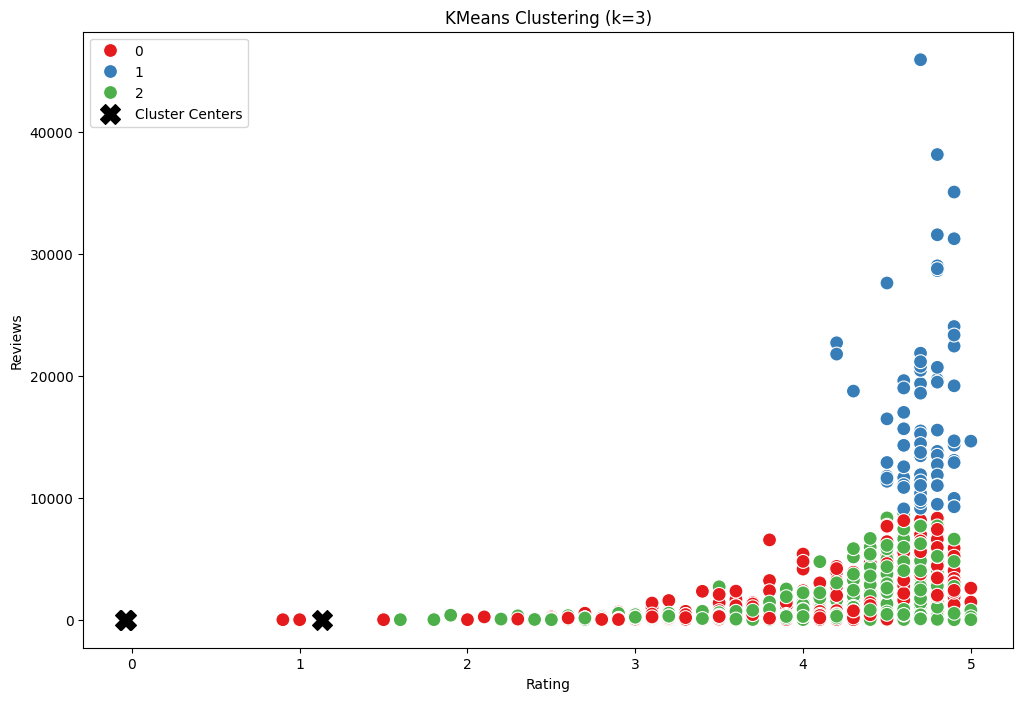

In [78]:
# Function to perform KMeans clustering
def kmeans_clustering(df, n_clusters=3):

    # Select relevant numeric columns for clustering (e.g., 'Rating', 'Reviews', 'Density')
    clustering_data = df[['Rating', 'Number of Reviews', 'Density']].dropna()

    # Normalize the data
    scaler = StandardScaler()
    clustering_data_scaled = scaler.fit_transform(clustering_data)

    # KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(clustering_data_scaled)

    # Silhouette score for clustering quality
    silhouette_avg = silhouette_score(clustering_data_scaled, kmeans.labels_)

    # Add the cluster labels to the original dataframe
    df['Cluster'] = kmeans.labels_

    # Plot the clusters
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.scatterplot(x='Rating', y='Number of Reviews', hue='Cluster', data=df, palette='Set1', s=100, ax=ax)
    
    # Plot the cluster centers
    centers = kmeans.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Cluster Centers')

    ax.set_title(f'KMeans Clustering (k={n_clusters})')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Reviews')
    ax.legend()
    #plt.savefig('K-means_clustering.png')--for saving image
    plt.show()

    return kmeans.labels_, silhouette_avg

kmeans_labels, silhouette_avg = kmeans_clustering(df, n_clusters=3)

### Fitting-exponential

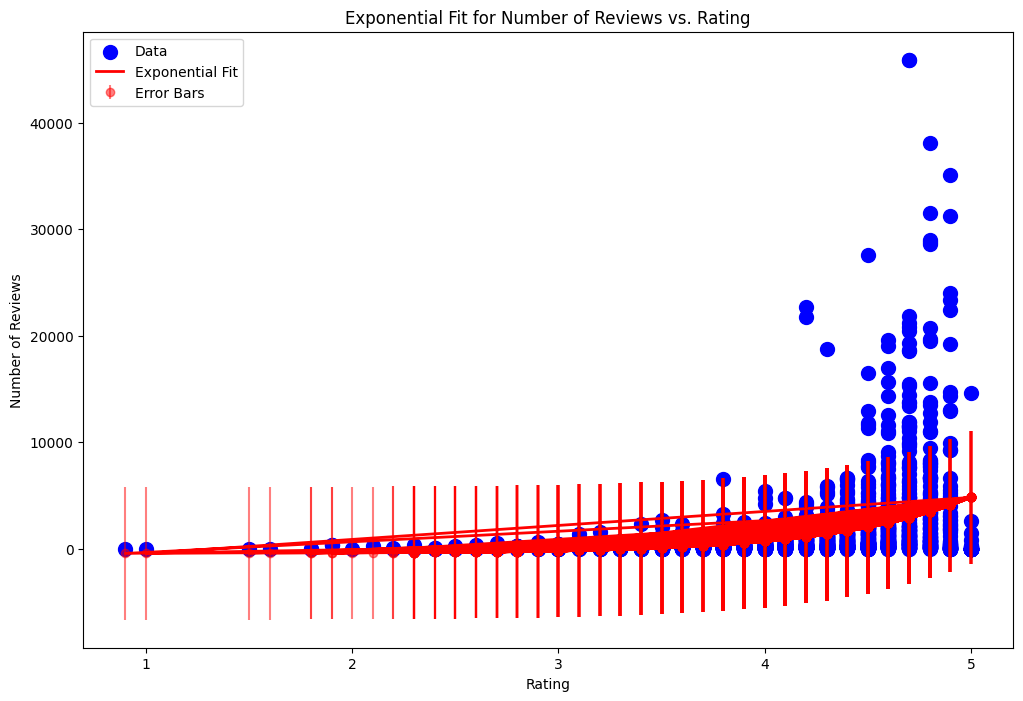

In [79]:
def exponential_fit(df):
    
    # Define the exponential function for fitting
    def exp_func(x, a, b, c):
        return a * np.exp(b * x) + c
    
    # Select relevant columns for fitting (e.g., 'Rating' and 'Number of Reviews')
    x_data = df['Rating']
    y_data = df['Number of Reviews']
    
    # Initial guess for the parameters
    initial_guess = [1, 1, 1]
    
    # Fit the data to the exponential function using curve_fit
    params, covariance = curve_fit(exp_func, x_data, y_data, p0=initial_guess)
    
    # Get the fitted values and the associated error (confidence interval)
    y_fit = exp_func(x_data, *params)
    
    # Calculate the residuals
    residuals = y_data - y_fit
    
    # Calculate the standard deviation of the residuals (used as error bars)
    error = np.std(residuals)
    
    # Calculate the confidence interval (95% CI)
    conf_interval = 1.96 * error
    
    # Plot the original data and the fitted curve
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Scatter plot of the data
    ax.scatter(x_data, y_data, color='blue', label='Data', s=100)
    
    # Plot the fitted exponential curve
    ax.plot(x_data, y_fit, color='red', label='Exponential Fit', lw=2)
    
    # Add error bars
    ax.errorbar(x_data, y_fit, yerr=conf_interval, fmt='o', color='red', alpha=0.5, label='Error Bars')
    
    # Set the title and labels
    ax.set_title('Exponential Fit for Number of Reviews vs. Rating')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Number of Reviews')
    
    ax.legend()
    #plt.savefig('Exp_fit.png')--for saving image
    plt.show()
    return params, error, conf_interval

params, error, conf_interval = exponential_fit(df)



In [80]:
print(f"Fit Parameters (a, b, c): {params}")
print(f"Error (standard deviation of residuals): {error}")
print(f"Confidence Interval (95% CI): {conf_interval}")

Fit Parameters (a, b, c): [   2.56389677    1.52555789 -456.93946857]
Error (standard deviation of residuals): 3175.016785094858
Confidence Interval (95% CI): 6223.032898785921


### predicting with unseen data

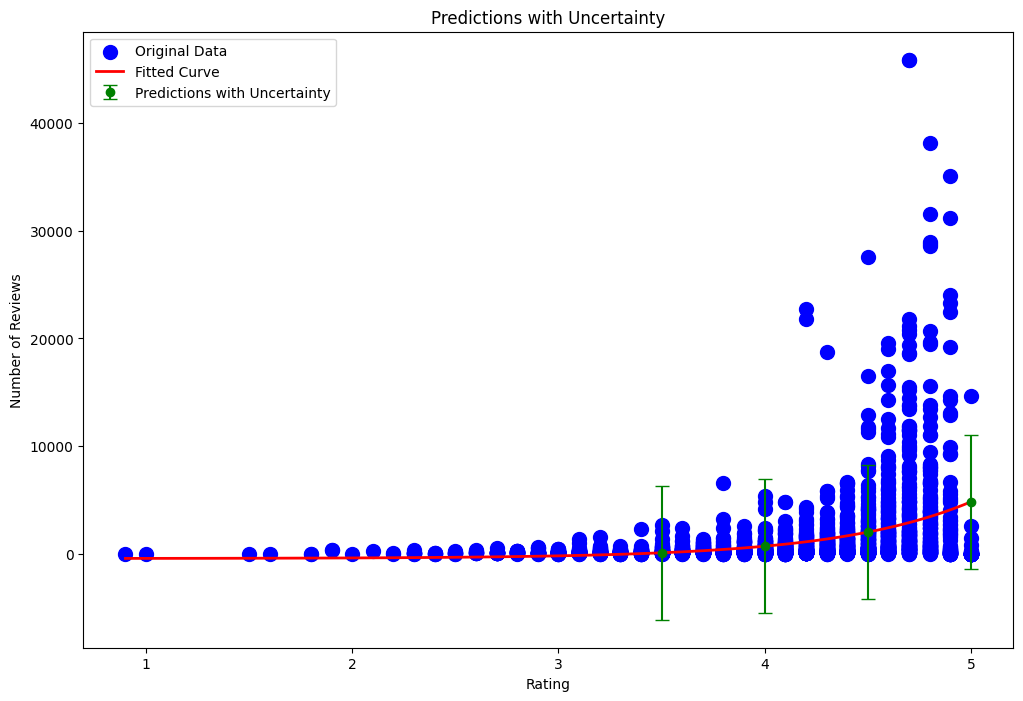

Predictions for unseen data: [  77.37304749  688.74766265 1999.67339969 4810.59528855]
Associated uncertainty (95% CI): ± 6223.032898785921


In [81]:
def predict_with_uncertainty(df, unseen_x_values):

    # Define the exponential function
    def exp_func(x, a, b, c):
        return a * np.exp(b * x) + c
    
    # Extract x and y data
    x_data = df['Rating']
    y_data = df['Number of Reviews']
    
    # Fit the model to the data
    initial_guess = [1, 1, 1]
    params, covariance = curve_fit(exp_func, x_data, y_data, p0=initial_guess)
    
    # Calculate residuals and standard deviation of residuals
    y_fit = exp_func(x_data, *params)
    residuals = y_data - y_fit
    error = np.std(residuals)
    
    # Make predictions for unseen data
    predictions = exp_func(unseen_x_values, *params)
    
    # Calculate confidence intervals
    conf_interval = 1.96 * error  # 95% CI
    
    # Plot predictions with uncertainties
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Scatter plot of the original data
    ax.scatter(x_data, y_data, color='blue', label='Original Data', s=100)
    
    # Plot the fitted curve
    x_range = np.linspace(min(x_data), max(x_data), 100)
    y_range = exp_func(x_range, *params)
    ax.plot(x_range, y_range, color='red', label='Fitted Curve', lw=2)
    
    # Plot unseen predictions with error bars
    ax.errorbar(unseen_x_values, predictions, yerr=conf_interval, fmt='o', color='green', 
                label='Predictions with Uncertainty', capsize=5)
    
    # Set labels and title
    ax.set_title('Predictions with Uncertainty')
    ax.set_xlabel('Rating')
    ax.set_ylabel('Number of Reviews')
    ax.legend()
    
    
    plt.show()
    
    
    return predictions, conf_interval

# let unseen ratings
unseen_x_values = np.array([3.5, 4.0, 4.5, 5.0]) 
predictions, conf_interval = predict_with_uncertainty(df, unseen_x_values)

print("Predictions for unseen data:", predictions)
print("Associated uncertainty (95% CI): ±", conf_interval)
